In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("airportsSubtitleTools.com.csv")
df.head()


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Altitude_CATEGORY,Coord_X,Coord_Y,Coord_X_Nearest_End
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,2,16158.656679,-675.910224,3840.837979
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,1,16202.779039,-578.707337,3796.715620
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,2,16036.849596,-647.581008,3962.645063
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports,1,16306.913146,-730.158416,3692.581512
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports,1,16361.818285,-1049.523652,3637.676374


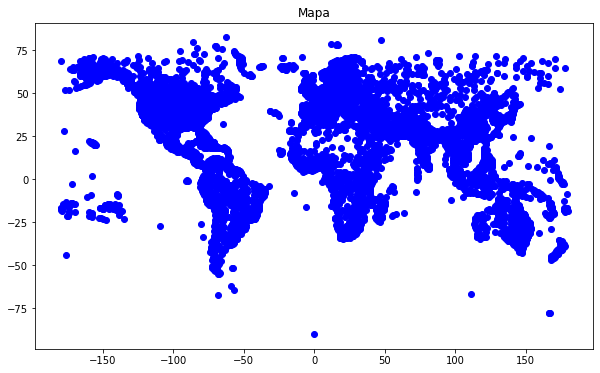

In [3]:
features = df.columns[3:7]
df[features].head()
fig = plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'],df['Latitude'],color = "blue")
plt.title("Mapa")

plt.show()

In [4]:
from mpl_toolkits.basemap import Basemap

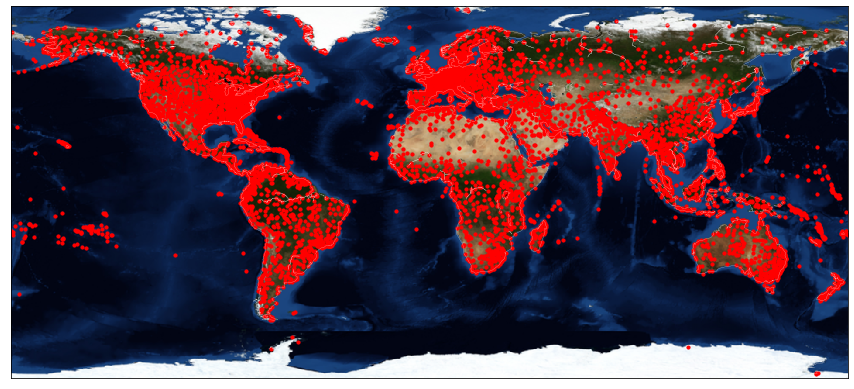

In [5]:
# make up some data for scatter plot
lats = np.random.randint(-75, 75, size=20)
lons = np.random.randint(-179, 179, size=20)

fig = plt.gcf()
fig.set_size_inches(15, 10)

m = Basemap(projection='cyl', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(list(df['Longitude']),list(df['Latitude']))  # transform coordinates


plt.scatter(x, y, 10, marker='o', color='Red') 

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


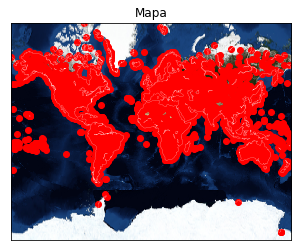

In [6]:
m = Basemap(projection = "merc",resolution = 'c', llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20 )

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
x,y = m(list(df['Longitude']),list(df['Latitude']))
plt.scatter(x,y,color = "red")
plt.title("Mapa")

plt.show()

In [6]:
matrica = pd.read_csv("../DataMining_FirstProject/Data/Matrica_povezanosti.csv")

matrica.head(n = 10) #Uvid u matricu povezanosti


,Source airport ID,1,2,3,4,5,6,7,8,9,...,5807,5809,5810,5832,5857,5858,5859,5875,5878,5885
0,1,0,8,12,6,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8,0,24,12,16,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,12,24,0,18,48,84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6,12,18,0,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,16,16,48,24,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,56,84,0,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,897,414,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,897,0,702,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,414,702,0,...,0,0,0,0,0,0,0,0,0,0
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
aer1 = matrica.loc[matrica[' Source airport ID'] == 1]['2'][0]
aer1

8

In [8]:
def moja_metrika(air1,air2): # Definisemo nase racunanje rastojanja izmedju aerodroma -  
    id_air1 = int(air1[0])   # zapravo, ona nam samo govori 
    id_air2 = int(air2[0])   # da li su  su aerodromi povezani ili ne
    kolone = matrica.columns # i na osnovu toga, vraca 1 kao distancu ako su povezani
                             # i beskonacno, ako nisu
    if str(id_air2) in kolone: 
        aer1 = matrica[matrica[' Source airport ID'] == id_air1]
        if not aer1.empty:
            aer1 = aer1.iloc[0,]
            vr1 = aer1[str(id_air2)]
        else:
            vr1 = 0
    else:
        vr1 = 0
    if str(id_air1) in kolone:
        aer2 = matrica[matrica[' Source airport ID'] == id_air2]
        if not aer2.empty:
            aer2 = aer2.iloc[0,]
            vr2 = aer2[str(id_air1)]
        else:
            vr2 = 0
    else:
        vr2 = 0
    
    
    if vr1 != 0:
        return 1
    elif vr2 != 0:
        return 1
    else:
        return float('Inf')

In [9]:
# Namerno uzimamo eps koje je vece od vrednosti koju vraca metrika izmedju 2 aerodroma
# koja su povezana. Za minimalan broj suseda uzimamo 1 - tako da ce aerodrom pripasti
# nekom klasteru (tj nece biti sum) ako je povezan sa bar jednim aerodrom
# Klaster kome pripada je zapravo jedna od KOMPONENTI POVEZANOSTI.
est = DBSCAN(eps = 1.1,min_samples= 1,metric = moja_metrika)

x = pd.DataFrame(df['Airport ID'])
est.fit(x)



DBSCAN(algorithm='auto', eps=1.1, leaf_size=30,
       metric=<function moja_metrika at 0x7fadb1846e18>, metric_params=None,
       min_samples=1, n_jobs=None, p=None)

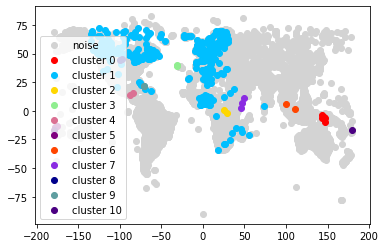

In [10]:
# Algoritam DBSCAN ce nam naci komponente povezanosti, sam je i zasnovan na toj ideji.
# Na slici koju na kraju dajemo svaka komponenta povezanosti ce biti obojena drugacijom bojom,
# a sumovi, tj. aerodromi koji nisu ni sa kim povezani ce biti obojeni svetlo sivom bojom.
# Iz ovakvog grafickog prikaza mozemo puno zakljuciti.
df['labels'] =est.labels_
num = max(df['labels']) + 1
colors = ['red','deepskyblue','gold','lightgreen','palevioletred','purple','orangered',
          'blueviolet','darkblue','cadetblue','indigo','tomato','mediumaquamarine',
          'olive','c','maroon','darkseagreen','cornflowerblue','orchid','lightcoral',
          'lavender','slateblue','yellowgreen','forestgreen','antiquewhite', 'sienna',
          'darkcyan','deeppink','thistle','plum','powderblue','sandybrown','m',
          'chartreuse','lemonchiffon','mistyrose','darkmagenta','brown','peru',
          'chocolate','royalblue']
for i in range(-1,num):
    if i == -1:
        color = 'lightgray'
        label = 'noise'
    else:
        color = colors[i]
        label = 'cluster %d'%i
    cluster = df.loc[df['labels'] == i]
    plt.scatter(cluster['Longitude'],cluster['Latitude'], color= color,label =label)

plt.legend()
plt.show()